# Introduction

Accident severity prediction involves using data analytics and machine learning techniques to predict the potential severity of a traffic accident. The goal is to assess the risk and likely consequences of an accident, enabling better preventive measures and efficient emergency resposes

# Import Required libiaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

# Load The Data Set

In [5]:
#load the data set
df= pd.read_csv("C:\\Users\\ragul\\project\\Vehicle Collision.csv")

In [7]:
df

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10253606,4230743.0,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.0,Not Ejected,...,Back,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NaN,NaN,M
1,10248708,4229547.0,10/26/2019,1:15,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,24.0,NaN,...,Shoulder - Upper Arm,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F
2,10254556,4230715.0,10/26/2019,8:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,42.0,Not Ejected,...,Knee-Lower Leg Foot,Driver,Unknown,NaN,NaN,None Visible,Driver,NaN,NaN,M
3,10250834,4230376.0,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,36.0,Not Ejected,...,Back,Driver,NaN,NaN,NaN,Internal,Driver,NaN,NaN,M
4,10252474,4229773.0,10/26/2019,16:50,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773.0,50.0,Not Ejected,...,Head,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230655,10091762,4193169.0,08/22/2019,14:00,7a710fd4-d131-4f2f-a7d9-942c34a60fc2,Occupant,Injured,19062202.0,56.0,Not Ejected,...,Back,"Left rear passenger, or rear passenger on a bi...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F
230656,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230657,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230658,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploaring Data Analysis

EDA allows us to gain a comprehensive overview of the data's structure, uncover potential patterns, and identify key trends.
Throughout the EDA process, we will analyze the distribution of individual features, investigate correlations, and explore any inherent relationships between variable

Visualizations will play a crucial role in providing a clear representation of the data, offering insights into customer behavior and identifying the factors that may contributeAccident Servity predectiontion

In [9]:
# check the first 5 rows
df.head(5)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10253606,4230743.0,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.0,Not Ejected,...,Back,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NaN,NaN,M
1,10248708,4229547.0,10/26/2019,1:15,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,24.0,NaN,...,Shoulder - Upper Arm,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F
2,10254556,4230715.0,10/26/2019,8:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,42.0,Not Ejected,...,Knee-Lower Leg Foot,Driver,Unknown,NaN,NaN,None Visible,Driver,NaN,NaN,M
3,10250834,4230376.0,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,36.0,Not Ejected,...,Back,Driver,NaN,NaN,NaN,Internal,Driver,NaN,NaN,M
4,10252474,4229773.0,10/26/2019,16:50,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773.0,50.0,Not Ejected,...,Head,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F


In [11]:
# check the last 5 rows
df.tail(5)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
230655,10091762,4193169.0,08/22/2019,14:00,7a710fd4-d131-4f2f-a7d9-942c34a60fc2,Occupant,Injured,19062202.0,56.0,Not Ejected,...,Back,"Left rear passenger, or rear passenger on a bi...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F
230656,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230657,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230658,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230659,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(230660, 21)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230660 entries, 0 to 230659
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   UNIQUE_ID              230660 non-null  object 
 1   COLLISION_ID           230656 non-null  float64
 2   CRASH_DATE             230656 non-null  object 
 3   CRASH_TIME             230656 non-null  object 
 4   PERSON_ID              230653 non-null  object 
 5   PERSON_TYPE            230656 non-null  object 
 6   PERSON_INJURY          230656 non-null  object 
 7   VEHICLE_ID             181937 non-null  float64
 8   PERSON_AGE             229663 non-null  float64
 9   EJECTION               102787 non-null  object 
 10  EMOTIONAL_STATUS       126918 non-null  object 
 11  BODILY_INJURY          126959 non-null  object 
 12  POSITION_IN_VEHICLE    102906 non-null  object 
 13  SAFETY_EQUIPMENT       90120 non-null   object 
 14  PED_LOCATION           26292 non-nul

In [17]:
df.isna().sum()

UNIQUE_ID                     0
COLLISION_ID                  4
CRASH_DATE                    4
CRASH_TIME                    4
PERSON_ID                     7
PERSON_TYPE                   4
PERSON_INJURY                 4
VEHICLE_ID                48723
PERSON_AGE                  997
EJECTION                 127873
EMOTIONAL_STATUS         103742
BODILY_INJURY            103701
POSITION_IN_VEHICLE      127754
SAFETY_EQUIPMENT         140540
PED_LOCATION             204368
PED_ACTION               204430
COMPLAINT                103687
PED_ROLE                 103687
CONTRIBUTING_FACTOR_1    205452
CONTRIBUTING_FACTOR_2    205477
PERSON_SEX               103768
dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COLLISION_ID,230656.0,2.824113e+06,1.497211e+06,39.0,2812695.0,3474966.5,3873819.25,4695378.0
VEHICLE_ID,181937.0,1.567930e+07,3.051295e+06,602947.0,13535225.0,17145743.0,17959965.00,20585753.0
PERSON_AGE,229663.0,3.647403e+01,8.492469e+01,-997.0,23.0,33.0,49.00,9999.0


In [21]:
df.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')

# Data Cleaning

Data cleaning is a crucial step in the machine learning pipeline where you preprocess and prepare your dataset before feeding it into a machine learning model.
Addressing these data cleaning steps, you can prepare a high-quality dataset for training machine learning models to predict salary ranges effecteive

In [23]:
df

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10253606,4230743.0,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.0,Not Ejected,...,Back,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NaN,NaN,M
1,10248708,4229547.0,10/26/2019,1:15,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,24.0,NaN,...,Shoulder - Upper Arm,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F
2,10254556,4230715.0,10/26/2019,8:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,42.0,Not Ejected,...,Knee-Lower Leg Foot,Driver,Unknown,NaN,NaN,None Visible,Driver,NaN,NaN,M
3,10250834,4230376.0,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,36.0,Not Ejected,...,Back,Driver,NaN,NaN,NaN,Internal,Driver,NaN,NaN,M
4,10252474,4229773.0,10/26/2019,16:50,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773.0,50.0,Not Ejected,...,Head,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230655,10091762,4193169.0,08/22/2019,14:00,7a710fd4-d131-4f2f-a7d9-942c34a60fc2,Occupant,Injured,19062202.0,56.0,Not Ejected,...,Back,"Left rear passenger, or rear passenger on a bi...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F
230656,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230657,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230658,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.isna().sum()

UNIQUE_ID                     0
COLLISION_ID                  4
CRASH_DATE                    4
CRASH_TIME                    4
PERSON_ID                     7
PERSON_TYPE                   4
PERSON_INJURY                 4
VEHICLE_ID                48723
PERSON_AGE                  997
EJECTION                 127873
EMOTIONAL_STATUS         103742
BODILY_INJURY            103701
POSITION_IN_VEHICLE      127754
SAFETY_EQUIPMENT         140540
PED_LOCATION             204368
PED_ACTION               204430
COMPLAINT                103687
PED_ROLE                 103687
CONTRIBUTING_FACTOR_1    205452
CONTRIBUTING_FACTOR_2    205477
PERSON_SEX               103768
dtype: int64

In [27]:
#Dropping the null columns
null_columns =[ 'EJECTION','POSITION_IN_VEHICLE','SAFETY_EQUIPMENT','PED_LOCATION','PED_ACTION','CONTRIBUTING_FACTOR_1','CONTRIBUTING_FACTOR_2','PERSON_AGE']
df=df.drop(null_columns,axis=1)

In [29]:
df.isna().sum()

UNIQUE_ID                0
COLLISION_ID             4
CRASH_DATE               4
CRASH_TIME               4
PERSON_ID                7
PERSON_TYPE              4
PERSON_INJURY            4
VEHICLE_ID           48723
EMOTIONAL_STATUS    103742
BODILY_INJURY       103701
COMPLAINT           103687
PED_ROLE            103687
PERSON_SEX          103768
dtype: int64

In [31]:
df.shape

(230660, 13)

In [33]:
df

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,EMOTIONAL_STATUS,BODILY_INJURY,COMPLAINT,PED_ROLE,PERSON_SEX
0,10253606,4230743.0,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,Conscious,Back,Complaint of Pain or Nausea,Driver,M
1,10248708,4229547.0,10/26/2019,1:15,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,Conscious,Shoulder - Upper Arm,None Visible,Pedestrian,F
2,10254556,4230715.0,10/26/2019,8:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,Unknown,Knee-Lower Leg Foot,None Visible,Driver,M
3,10250834,4230376.0,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,Conscious,Back,Internal,Driver,M
4,10252474,4229773.0,10/26/2019,16:50,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773.0,Conscious,Head,Complaint of Pain or Nausea,Passenger,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230655,10091762,4193169.0,08/22/2019,14:00,7a710fd4-d131-4f2f-a7d9-942c34a60fc2,Occupant,Injured,19062202.0,Conscious,Back,Complaint of Pain or Nausea,Passenger,F
230656,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230657,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230658,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df=df.dropna(axis=0).reset_index(drop=True)

In [37]:
print("Total Missing Values :",df.isna().sum().sum())

Total Missing Values : 0


In [39]:
df.isna().sum()

UNIQUE_ID           0
COLLISION_ID        0
CRASH_DATE          0
CRASH_TIME          0
PERSON_ID           0
PERSON_TYPE         0
PERSON_INJURY       0
VEHICLE_ID          0
EMOTIONAL_STATUS    0
BODILY_INJURY       0
COMPLAINT           0
PED_ROLE            0
PERSON_SEX          0
dtype: int64

In [41]:
df

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,EMOTIONAL_STATUS,BODILY_INJURY,COMPLAINT,PED_ROLE,PERSON_SEX
0,10253606,4230743.0,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,Conscious,Back,Complaint of Pain or Nausea,Driver,M
1,10254556,4230715.0,10/26/2019,8:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,Unknown,Knee-Lower Leg Foot,None Visible,Driver,M
2,10250834,4230376.0,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,Conscious,Back,Internal,Driver,M
3,10252474,4229773.0,10/26/2019,16:50,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773.0,Conscious,Head,Complaint of Pain or Nausea,Passenger,F
4,10251087,4230391.0,10/26/2019,1:20,33a947c8-10cf-4671-8905-39da24df9549,Occupant,Injured,19142078.0,Conscious,Back,Complaint of Pain or Nausea,Passenger,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100440,9171002,3913079.0,06/03/2018,13:34,23076e0c-d04a-48f0-bee0-3a214413ebb7,Bicyclist,Injured,18607152.0,Conscious,Entire Body,Abrasion,Driver,M
100441,9929839,4155271.0,06/20/2019,10:48,5f9d4c75-6e55-445d-a03d-f2c38c1a0759,Occupant,Injured,18981315.0,Conscious,Head,Complaint of Pain or Nausea,Driver,F
100442,6173889,4022955.0,06/13/2016,18:40,944317,Occupant,Injured,17148067.0,Conscious,Neck,Whiplash,Driver,M
100443,6337872,3491760.0,07/28/2016,19:16,1364374,Occupant,Injured,17224706.0,Conscious,Back,Complaint of Pain,Passenger,F


In [43]:
# Finding unique value of each column
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'UNIQUE_ID': 100445,
 'CRASH_DATE': 1598,
 'CRASH_TIME': 1440,
 'PERSON_ID': 100445,
 'PERSON_TYPE': 4,
 'PERSON_INJURY': 2,
 'EMOTIONAL_STATUS': 8,
 'BODILY_INJURY': 14,
 'COMPLAINT': 21,
 'PED_ROLE': 3,
 'PERSON_SEX': 3}

In [45]:
unneeded_columns =['EMOTIONAL_STATUS']
df=df.drop(unneeded_columns,axis=1)

In [47]:
df['COLLISION_ID'] = df['COLLISION_ID'].astype('int64')

In [49]:
df['VEHICLE_ID'] = df['VEHICLE_ID'].astype('int64')

In [51]:
df

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,BODILY_INJURY,COMPLAINT,PED_ROLE,PERSON_SEX
0,10253606,4230743,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343,Back,Complaint of Pain or Nausea,Driver,M
1,10254556,4230715,10/26/2019,8:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832,Knee-Lower Leg Foot,None Visible,Driver,M
2,10250834,4230376,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949,Back,Internal,Driver,M
3,10252474,4229773,10/26/2019,16:50,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773,Head,Complaint of Pain or Nausea,Passenger,F
4,10251087,4230391,10/26/2019,1:20,33a947c8-10cf-4671-8905-39da24df9549,Occupant,Injured,19142078,Back,Complaint of Pain or Nausea,Passenger,M
...,...,...,...,...,...,...,...,...,...,...,...,...
100440,9171002,3913079,06/03/2018,13:34,23076e0c-d04a-48f0-bee0-3a214413ebb7,Bicyclist,Injured,18607152,Entire Body,Abrasion,Driver,M
100441,9929839,4155271,06/20/2019,10:48,5f9d4c75-6e55-445d-a03d-f2c38c1a0759,Occupant,Injured,18981315,Head,Complaint of Pain or Nausea,Driver,F
100442,6173889,4022955,06/13/2016,18:40,944317,Occupant,Injured,17148067,Neck,Whiplash,Driver,M
100443,6337872,3491760,07/28/2016,19:16,1364374,Occupant,Injured,17224706,Back,Complaint of Pain,Passenger,F


In [53]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

In [55]:
# Calculate skewness only for numeric columns
skewness = df[numeric_cols].skew()
print(skewness)

COLLISION_ID    0.065445
VEHICLE_ID      0.280390
dtype: float64


# Checking the duplicated & Null Values

Before moving further with the analysis, it is essential to ensure the integrity of our dataset.
We will begin by examining for any missing values and identifying potential duplicate

This step is crucial for maintaining data quality and setting the foundation for a robust exploratory data analysis (EDA) and subsequent machine learning m detectiont.



In [57]:
df.duplicated().sum()

0

In [59]:
df.isna().sum()

UNIQUE_ID        0
COLLISION_ID     0
CRASH_DATE       0
CRASH_TIME       0
PERSON_ID        0
PERSON_TYPE      0
PERSON_INJURY    0
VEHICLE_ID       0
BODILY_INJURY    0
COMPLAINT        0
PED_ROLE         0
PERSON_SEX       0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100445 entries, 0 to 100444
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   UNIQUE_ID      100445 non-null  object
 1   COLLISION_ID   100445 non-null  int64 
 2   CRASH_DATE     100445 non-null  object
 3   CRASH_TIME     100445 non-null  object
 4   PERSON_ID      100445 non-null  object
 5   PERSON_TYPE    100445 non-null  object
 6   PERSON_INJURY  100445 non-null  object
 7   VEHICLE_ID     100445 non-null  int64 
 8   BODILY_INJURY  100445 non-null  object
 9   COMPLAINT      100445 non-null  object
 10  PED_ROLE       100445 non-null  object
 11  PERSON_SEX     100445 non-null  object
dtypes: int64(2), object(10)
memory usage: 9.2+ MB


Our dataset does not have any null values and duplicates.Now we can proceed with confidence, knowing that our dataset is clean and ready for further analysis.

# Analysis

To perform a comprehensive analysis, we'd typically start by examining the characteristics of the dataset, exploring the distribution of variables, identifying patterns, and gaining insights that might inform our modeling approach.
This, in turn, can lead to more accurate and reliable predictions of salary ranges in your machine learning melod

In [63]:
df

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,BODILY_INJURY,COMPLAINT,PED_ROLE,PERSON_SEX
0,10253606,4230743,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343,Back,Complaint of Pain or Nausea,Driver,M
1,10254556,4230715,10/26/2019,8:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832,Knee-Lower Leg Foot,None Visible,Driver,M
2,10250834,4230376,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949,Back,Internal,Driver,M
3,10252474,4229773,10/26/2019,16:50,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773,Head,Complaint of Pain or Nausea,Passenger,F
4,10251087,4230391,10/26/2019,1:20,33a947c8-10cf-4671-8905-39da24df9549,Occupant,Injured,19142078,Back,Complaint of Pain or Nausea,Passenger,M
...,...,...,...,...,...,...,...,...,...,...,...,...
100440,9171002,3913079,06/03/2018,13:34,23076e0c-d04a-48f0-bee0-3a214413ebb7,Bicyclist,Injured,18607152,Entire Body,Abrasion,Driver,M
100441,9929839,4155271,06/20/2019,10:48,5f9d4c75-6e55-445d-a03d-f2c38c1a0759,Occupant,Injured,18981315,Head,Complaint of Pain or Nausea,Driver,F
100442,6173889,4022955,06/13/2016,18:40,944317,Occupant,Injured,17148067,Neck,Whiplash,Driver,M
100443,6337872,3491760,07/28/2016,19:16,1364374,Occupant,Injured,17224706,Back,Complaint of Pain,Passenger,F


In [65]:
#check the value counts for UNIQUE_ID
df['UNIQUE_ID'].value_counts()

UNIQUE_ID
10253606    1
9270884     1
7459736     1
6433925     1
9201090     1
           ..
6227589     1
9478382     1
9785033     1
5730368     1
10091762    1
Name: count, Length: 100445, dtype: int64

In [67]:
#check the value counts for PERSON_ID
df['PERSON_ID'].value_counts()

PERSON_ID
84bcb3a7-d201-4c61-9e30-fe29268c1074    1
8f021f46-15e9-41b7-a07f-77e97bc64d9e    1
3bab3b24-ebfa-47c1-86ce-3d9a56f45bfe    1
844599                                  1
56904566-0d7a-41db-955f-ec5ef36604cd    1
                                       ..
918430                                  1
8918fc6f-d6a6-4ed3-a348-6f012cb3a302    1
05928b5e-729f-42e5-85a8-6342a96e8cbe    1
157535                                  1
7a710fd4-d131-4f2f-a7d9-942c34a60fc2    1
Name: count, Length: 100445, dtype: int64

In [69]:
#check the value counts for COLLISION_ID
df['COLLISION_ID'].value_counts()

COLLISION_ID
4025003    15
3876246    14
4149518    14
3692079    13
4233061    13
           ..
3414444     1
4075459     1
3644512     1
3912241     1
3491760     1
Name: count, Length: 79872, dtype: int64

In [71]:
#check the value counts for CRASH_DATE
df['CRASH_DATE'].value_counts()

CRASH_DATE
10/26/2019    157
11/01/2019    155
10/31/2019    155
06/26/2020    146
10/28/2019    142
             ... 
01/30/2023      1
09/07/2022      1
03/05/2015      1
05/02/2022      1
09/12/2012      1
Name: count, Length: 1598, dtype: int64

In [73]:
#check the values count for  PERSON_TYPE
df['PERSON_TYPE'].value_counts()

PERSON_TYPE
Occupant           90190
Bicyclist          10208
Other Motorized       40
Pedestrian             7
Name: count, dtype: int64

In [75]:
#check the values count for  VEHICLE_ID
df['VEHICLE_ID'].value_counts()

VEHICLE_ID
18968765    14
17756353    12
19153366    12
17818695    11
17295440    10
            ..
19093530     1
17639956     1
19117977     1
17511936     1
17224706     1
Name: count, Length: 86873, dtype: int64

In [77]:
#check the values count for  PERSON_INJURY
df['PERSON_INJURY'].value_counts()

PERSON_INJURY
Injured    100239
Killed        206
Name: count, dtype: int64

In [79]:
#check the values count for BODILY_INJURY
df['BODILY_INJURY'].value_counts()

BODILY_INJURY
Neck                    21152
Back                    19115
Head                    13207
Knee-Lower Leg Foot      9666
Entire Body              7905
Shoulder - Upper Arm     6584
Elbow-Lower-Arm-Hand     5869
Unknown                  5551
Chest                    4482
Face                     2662
Hip-Upper Leg            1889
Abdomen - Pelvis         1798
Does Not Apply            358
Eye                       207
Name: count, dtype: int64

In [81]:
#check the values count for  PED_ROLE
df['PED_ROLE'].value_counts()

PED_ROLE
Driver        63592
Passenger     36846
Pedestrian        7
Name: count, dtype: int64

In [83]:
#check the values count for  PERSON_SEX
df['PERSON_SEX'].value_counts()

PERSON_SEX
M    56795
F    43405
U      245
Name: count, dtype: int64

# Data Visualization

Data visualization is a powerful tool for understanding patterns, trends, and relationships within your dataset.
This techniques you can use to analyze your dataset for salary range predictio

Depending on the specific questions you want to explore and the characteristics of your data, you can customize these visualizations and explore additional techniques as needed.

In [85]:
# Convert CRASH_DATE to datetime and extract year and month
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year
df['CRASH_MONTH'] = df['CRASH_DATE'].dt.month

Here in this particular data visualization. I need to convert the CRASH_DATE to datatime and extract the year month in the the paticular column to display the visualization


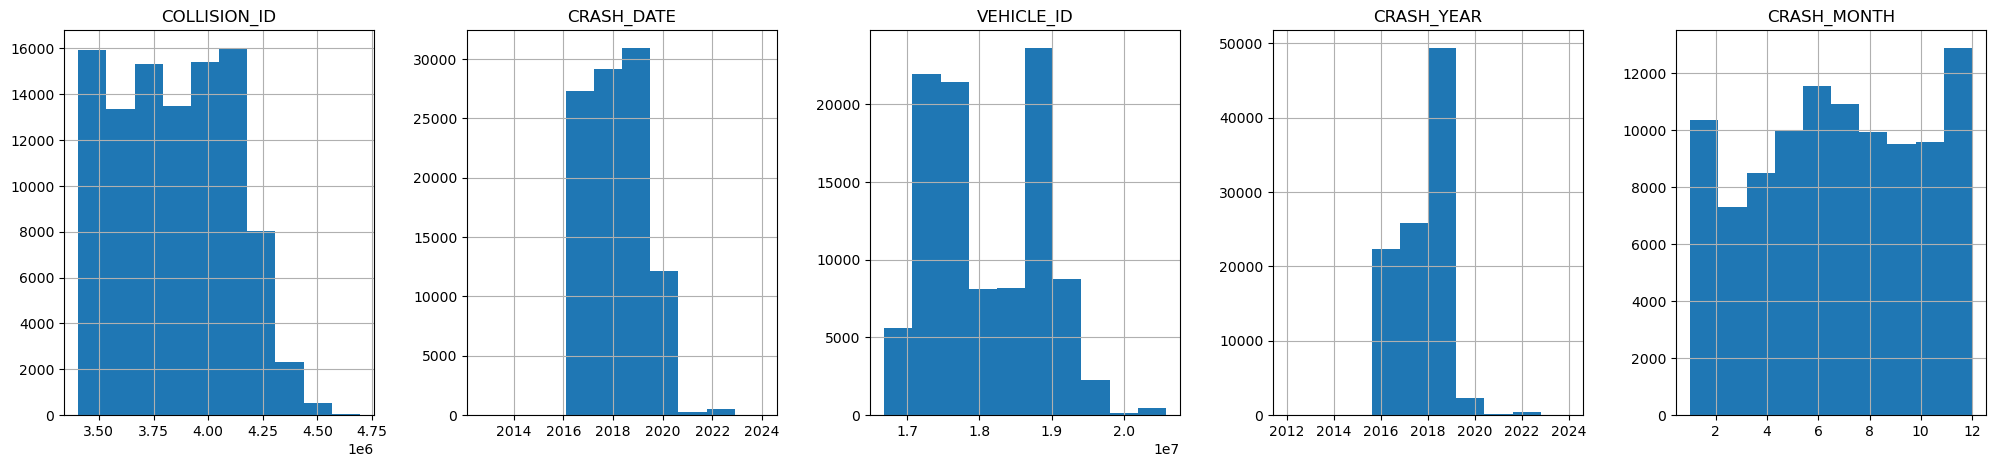

In [87]:
df.hist(layout=(1,6), figsize=(30,5))
plt.show()

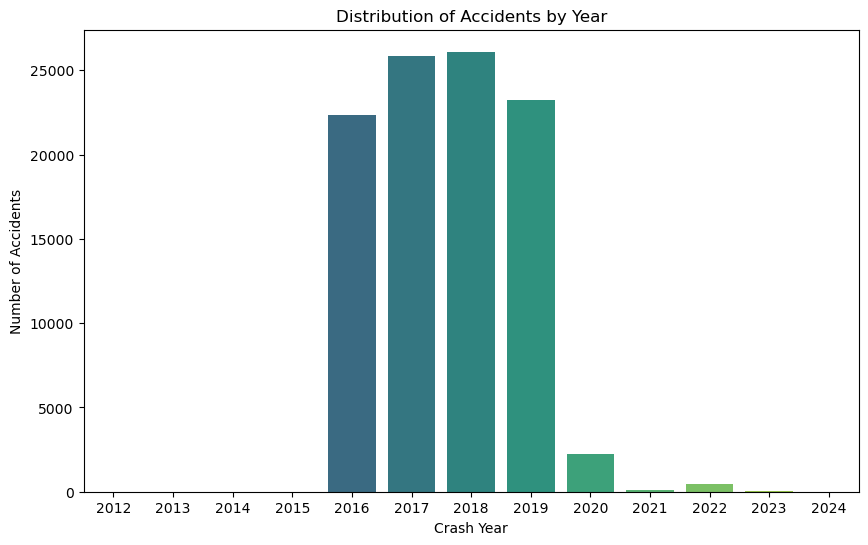

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CRASH_YEAR', data=df, palette='viridis')
plt.title('Distribution of Accidents by Year')
plt.xlabel('Crash Year')
plt.ylabel('Number of Accidents')
plt.show()

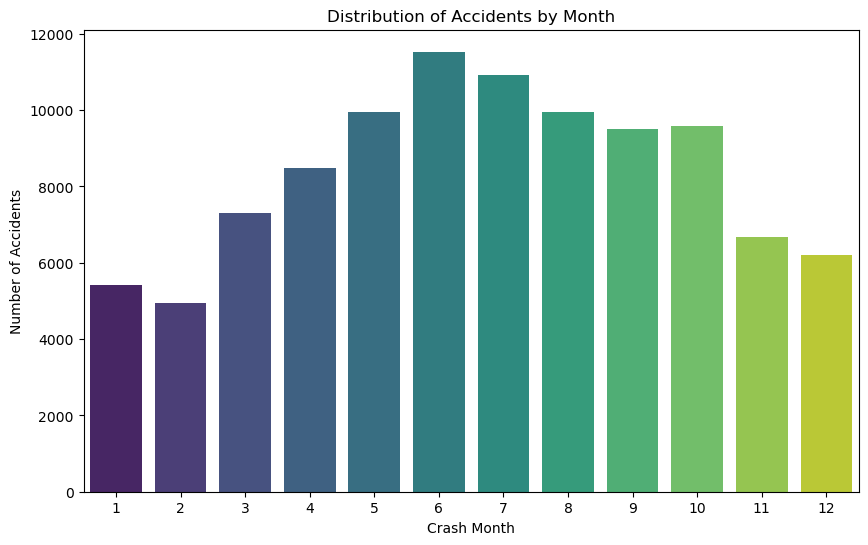

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CRASH_MONTH', data=df, palette='viridis')
plt.title('Distribution of Accidents by Month')
plt.xlabel('Crash Month')
plt.ylabel('Number of Accidents')
plt.show()

In [91]:
# Convert CRASH_HOUR to datetime 
df['CRASH_HOUR'] = pd.to_datetime(df['CRASH_TIME'], format='%H:%M').dt.hour

Here also i do the same thing i need to visualization the data. So i convert the CRASH_HOUR to datatime to visualization


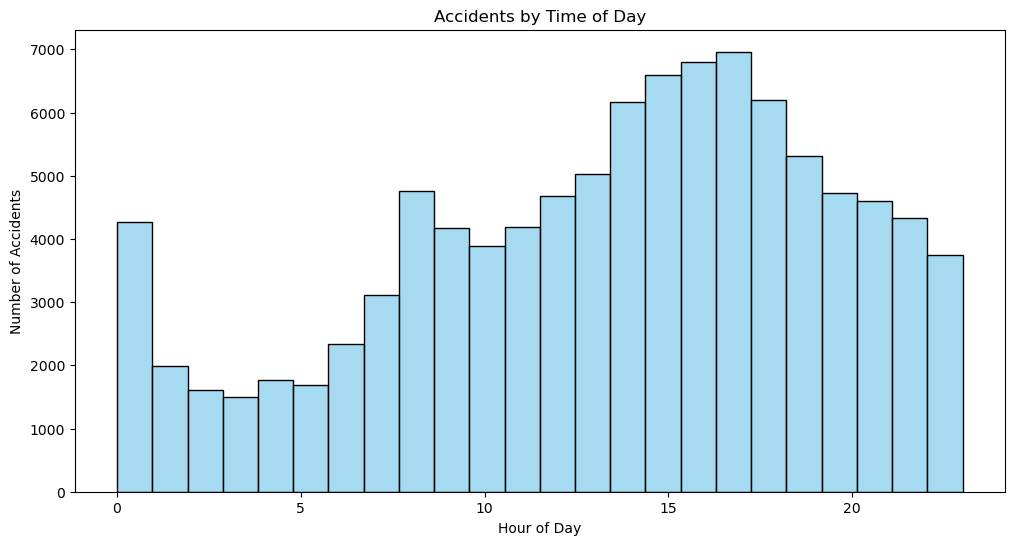

In [93]:
plt.figure(figsize=(12, 6))
sns.histplot(df['CRASH_HOUR'], bins=24, kde=False, color='skyblue')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

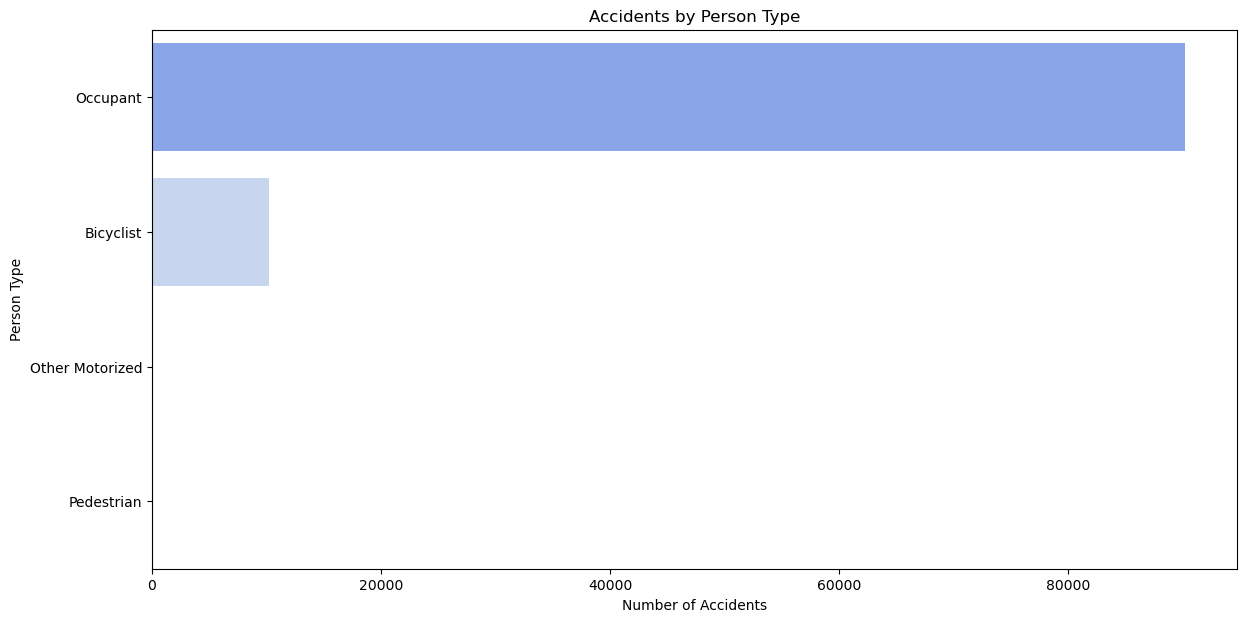

In [95]:
plt.figure(figsize=(14, 7))
sns.countplot(y='PERSON_TYPE', data=df, order=df['PERSON_TYPE'].value_counts().index, palette='coolwarm')
plt.title('Accidents by Person Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Person Type')
plt.show()

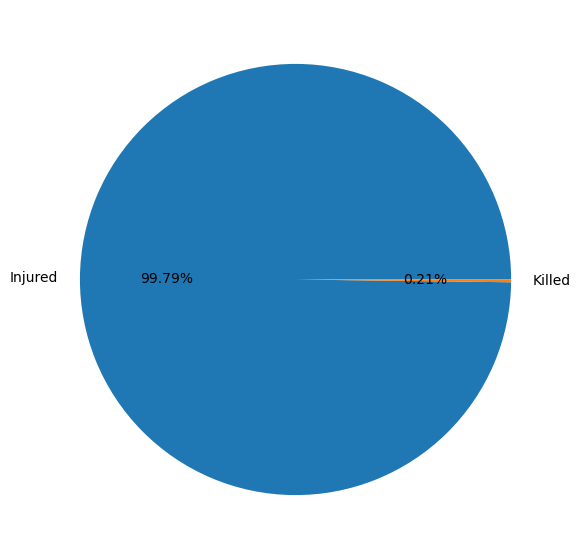

In [97]:
plt.figure(figsize=(10,7))
plt.pie(x=df['PERSON_INJURY'].value_counts().values,
        labels=df['PERSON_INJURY'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

Here fatel rate showing 0.21 % & here injuried showing 99.79% according to year

# Correlation Heatmap

In [99]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le = LabelEncoder()

In [103]:
cat_cols = df.select_dtypes(include='object').columns

In [108]:
df=df.apply(le.fit_transform) 

<Axes: >

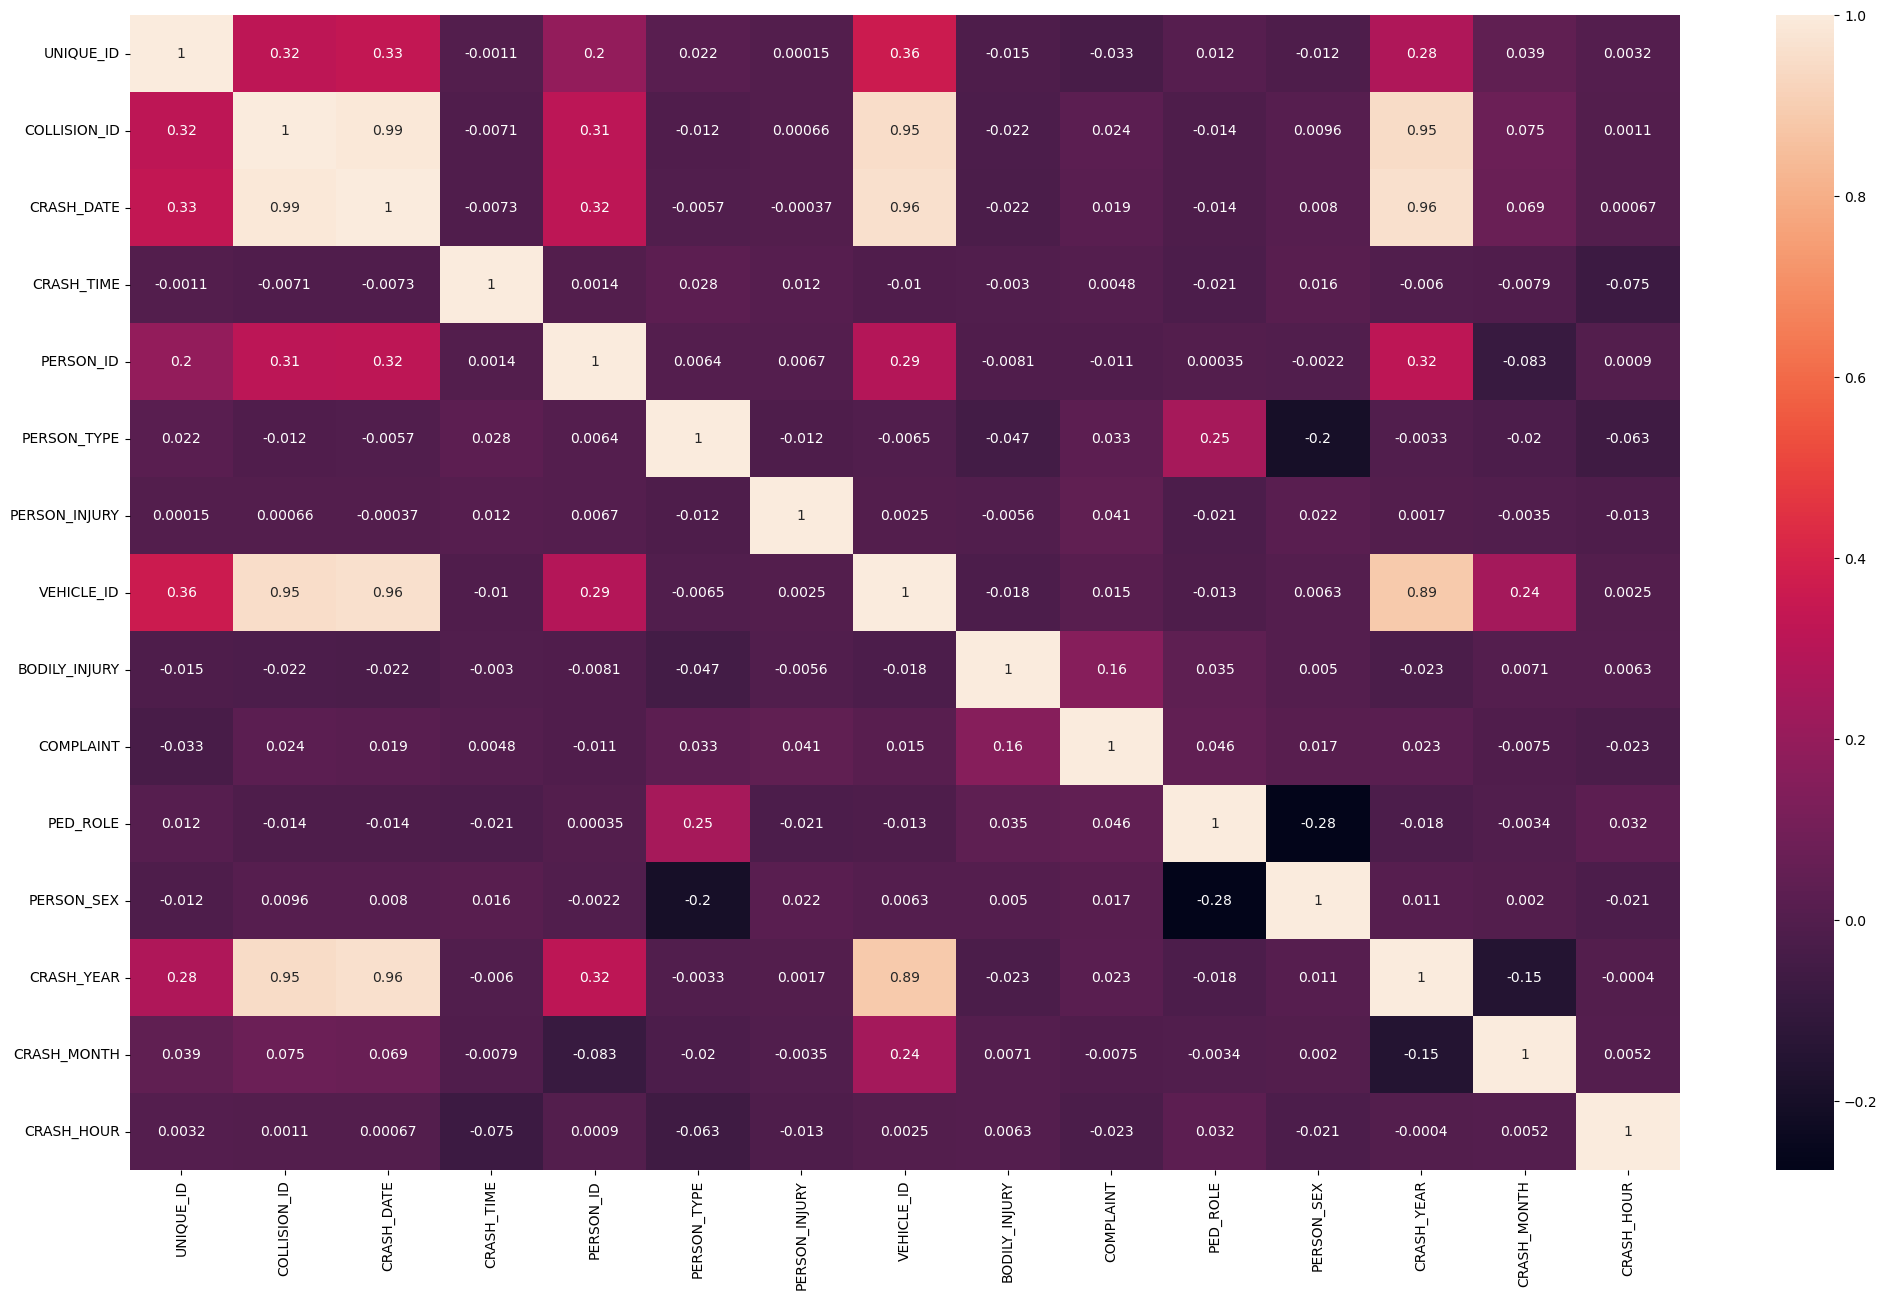

In [110]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

### ENCODING CATEGORICAL VARIABLE

To convert categorical data into numerical, we will use the one-hot encoding technique.
This process involves assigning binary numeric values to each unique class present in columns with categorical dat

By creating binary columns for each category, we ensure that our models can effectively interpret and utilize the categorical information during training and ectionn.



In [112]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,BODILY_INJURY,COMPLAINT,PED_ROLE,PERSON_SEX,CRASH_YEAR,CRASH_MONTH,CRASH_HOUR
0,7959,76943,1355,615,61300,1,0,83440,1,3,0,1,7,9,19
1,8006,76940,1357,1370,15989,0,0,83480,10,14,0,1,7,9,8
2,7835,76887,1357,640,97225,0,0,83338,1,10,0,1,7,9,19
3,7922,76801,1357,470,41073,1,0,83408,8,3,1,0,7,9,16
4,7847,76889,1357,680,32463,1,0,83348,1,3,1,1,7,9,1


In [114]:
df_dummies = pd.get_dummies(df)
df_dummies.tail()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,BODILY_INJURY,COMPLAINT,PED_ROLE,PERSON_SEX,CRASH_YEAR,CRASH_MONTH,CRASH_HOUR
100440,75845,45562,847,274,20975,0,0,55210,5,0,0,1,6,5,13
100441,98138,68583,1229,108,47902,1,0,74505,8,3,0,0,7,5,10
100442,21786,56257,127,580,66964,1,0,8346,11,20,0,1,4,5,18
100443,26387,8356,172,616,9444,1,0,12318,1,2,1,0,4,6,19
100444,3006,72860,1292,300,57616,1,0,79098,1,3,1,0,7,7,14


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100445 entries, 0 to 100444
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   UNIQUE_ID      100445 non-null  int32
 1   COLLISION_ID   100445 non-null  int64
 2   CRASH_DATE     100445 non-null  int64
 3   CRASH_TIME     100445 non-null  int32
 4   PERSON_ID      100445 non-null  int32
 5   PERSON_TYPE    100445 non-null  int32
 6   PERSON_INJURY  100445 non-null  int32
 7   VEHICLE_ID     100445 non-null  int64
 8   BODILY_INJURY  100445 non-null  int32
 9   COMPLAINT      100445 non-null  int32
 10  PED_ROLE       100445 non-null  int32
 11  PERSON_SEX     100445 non-null  int32
 12  CRASH_YEAR     100445 non-null  int64
 13  CRASH_MONTH    100445 non-null  int64
 14  CRASH_HOUR     100445 non-null  int64
dtypes: int32(9), int64(6)
memory usage: 8.0 MB


# Split the Data into Training & Testing

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
features = df.drop(columns=['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME'])
target = df['PERSON_INJURY']

In [120]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False, random_state=42)

we'll now split the dataset into training and testing data. We will do an 80:20 split, so our test size will be set to 0.2.
We will take Random State as 42 an shuffle give as false 

This will guarantee the reproducibility of our results across diffe.s.



In [122]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80356, 11)
(20089, 11)
(80356,)
(20089,)


# Standard Scaler

We will now use Standard Scaler to standardize the features of the dataset.This ensures that the consistency between the features of the dataset is maintained.Standardization is crucial for certain machine learning algorithms, promoting optimal model performance by mitigating the influence of varying magnitudes among features



In [124]:
from sklearn.preprocessing import StandardScaler

In [126]:
ss = StandardScaler()

In [128]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [130]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80356, 11)
(20089, 11)
(80356,)
(20089,)


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100445 entries, 0 to 100444
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   UNIQUE_ID      100445 non-null  int32
 1   COLLISION_ID   100445 non-null  int64
 2   CRASH_DATE     100445 non-null  int64
 3   CRASH_TIME     100445 non-null  int32
 4   PERSON_ID      100445 non-null  int32
 5   PERSON_TYPE    100445 non-null  int32
 6   PERSON_INJURY  100445 non-null  int32
 7   VEHICLE_ID     100445 non-null  int64
 8   BODILY_INJURY  100445 non-null  int32
 9   COMPLAINT      100445 non-null  int32
 10  PED_ROLE       100445 non-null  int32
 11  PERSON_SEX     100445 non-null  int32
 12  CRASH_YEAR     100445 non-null  int64
 13  CRASH_MONTH    100445 non-null  int64
 14  CRASH_HOUR     100445 non-null  int64
dtypes: int32(9), int64(6)
memory usage: 8.0 MB


# Checking silhouette_score 

In [134]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [135]:
# Assuming the dataset contains only features for clustering
x= df

In [136]:
scaler = StandardScaler()

In [137]:
# Standardize the features
x_scaled = scaler.fit_transform(x)

In [141]:
# Initialize the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)

In [144]:
# Fit the model on the dataset
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [146]:
# Predict the cluster labels
cluster_labels = kmeans.labels_

In [148]:
# Calculate the silhouette score
sil_score = silhouette_score(x_scaled, cluster_labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.1256731523321901


The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, In dataset Silhouwtte Score is  0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.

In [150]:
# Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

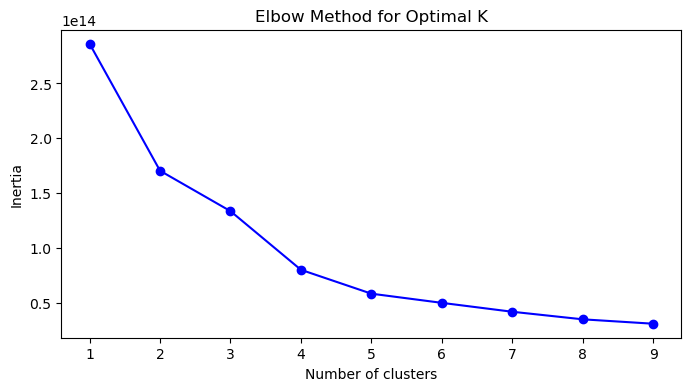

In [152]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Machine Learning Model

# 1.Logestic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [156]:
LR= LogisticRegression()

In [158]:
LR_model = LR.fit(x_train, y_train)

In [160]:
y_pred = LR_model.predict(x_test)

In [162]:
confusion_matrix(y_test,y_pred)

array([[20051,     0],
       [    0,    38]], dtype=int64)

In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20051
           1       1.00      1.00      1.00        38

    accuracy                           1.00     20089
   macro avg       1.00      1.00      1.00     20089
weighted avg       1.00      1.00      1.00     20089



In [166]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 100.0
Recall score: 100.0
F1-score: 100.0
Accuracy: 100.0


#### ROC_AUC(Linear Regression)

In [168]:
from sklearn.metrics import roc_curve, roc_auc_score

In [170]:
# Fit a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [172]:
y_probs = model.predict_proba(x_test)[:, 1]

In [174]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [176]:
# Compute the AUC
auc = roc_auc_score(y_test, y_probs)

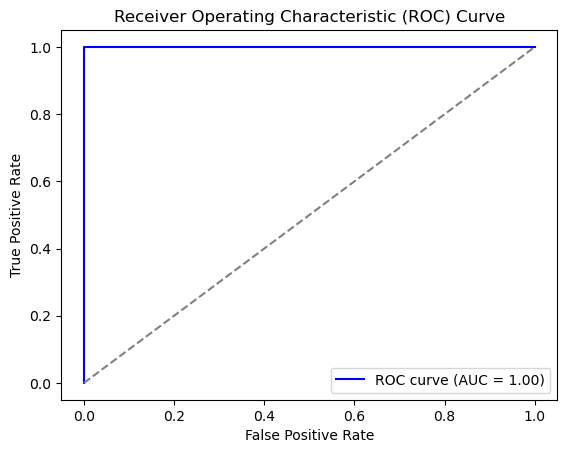

In [178]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 2.K Nearest Neighbour

In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [182]:
KNN = KNeighborsClassifier()

In [184]:
KNN_model = LR.fit(x_train, y_train)

In [186]:
y_pred =KNN_model.predict(x_test)

In [188]:
confusion_matrix(y_test,y_pred)

array([[20051,     0],
       [    0,    38]], dtype=int64)

In [190]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 100.0
Recall score: 100.0
F1-score: 100.0
Accuracy: 100.0


# 3. Random Forest Classifier

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [194]:
RFC= RandomForestClassifier()

In [196]:
RFC_model = RFC.fit(x_train, y_train)

In [198]:
y_pred =RFC_model.predict(x_test)

In [200]:
confusion_matrix(y_test,y_pred)

array([[20051,     0],
       [    0,    38]], dtype=int64)

In [202]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20051
           1       1.00      1.00      1.00        38

    accuracy                           1.00     20089
   macro avg       1.00      1.00      1.00     20089
weighted avg       1.00      1.00      1.00     20089



In [204]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 100.0
Recall score: 100.0
F1-score: 100.0
Accuracy: 100.0


# 4.Navie Bayes Classifier

In [332]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [334]:
GNB= GaussianNB()

In [336]:
GNB_model = GNB.fit(x_train, y_train)

In [338]:
y_pred =GNB_model.predict(x_test)

In [340]:
confusion_matrix(y_test,y_pred)

array([[20051,     0],
       [    0,    38]], dtype=int64)

In [342]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20051
           1       1.00      1.00      1.00        38

    accuracy                           1.00     20089
   macro avg       1.00      1.00      1.00     20089
weighted avg       1.00      1.00      1.00     20089



In [344]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 100.0
Recall score: 100.0
F1-score: 100.0
Accuracy: 100.0


# Hyper Parameter Tuning

#### 1.Logestic Regression

In [262]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [264]:
# Define the hyperparameters and their values to be tested
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [266]:
# Perform GridSearchCV
grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')

In [270]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [273]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [275]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 1.0


#### 2.K Nearest Neighbour

In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [290]:
# Define the hyperparameters and their values for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

In [292]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [294]:
# Fit the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [298]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [300]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score: 1.0


#### 3.Random Forest Classifier

In [310]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [312]:
# Define the hyperparameters and their values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [314]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [316]:
# Fit the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [319]:
 # Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [321]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 1.0


#### 4.Navie Bayes Classifier


In [324]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [326]:
# Define the hyperparameters and their values for tuning
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1.0]
}

In [330]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GNB, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [346]:
# Fit the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1.0]},
             scoring='accuracy')

In [348]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [350]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 1.0


# Conclusion

In [ ]:
Accuracy : 100.00 %

Recall : 100.00 %

Precision : 100.00 %

F1-Score : 100.00 %

Based on the provided metrics,  Logistic Regression, KNN classifier ,RandomForestClassifier and Naive Bayes Classifier in all metrics, demonstrating higher Accuracy, Precision, Recall, and F1-Score. It achieves a good balance between precision and recall, making it suitable for our Accident Servity prediction task. 

And Hyper parameter tuning Also giving  best score 1.0.here after Befor parameter score showing 1,0 & after hyper parameter tuning best score showing 1.0 only. so both befor and after hyper parameter tuning perform well in all algorithm modelm.

